# ++ Carregar dados históricos da Bovespa em Dataframe para análise ++

In [1]:
import time
time.asctime( time.localtime(time.time()) )

'Fri May 24 10:24:06 2024'

In [40]:
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
# pd.__version__

In [3]:
from IPython.display import FileLink, FileLinks
FileLink('Resultados.ipynb')

C:\Users\F0435280\OneDrive - Banco do Brasil S.A\Área de Trabalho\Alexandre\StockManager-main\Resultados.ipynb

In [4]:
# Setando opção do Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Setando separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
from pacote.functions import *

In [6]:
ano = time.localtime().tm_year
if time.localtime().tm_mon < 3:
    str_ano, str_nov_ant, str_dez_ant = f'A{ano}', f'M11{ano-1}', f'M12{ano-1}'
    LISTA_ARQUIVOS = [str_ano, str_nov_ant, str_dez_ant]
else:
    str_ano = f'A{ano}'
    LISTA_ARQUIVOS = [str_ano]

In [7]:
df = carrega_dados(LISTA_ARQUIVOS)

In [8]:
from IPython.display import Markdown, display

# Monday is 0 and Sunday is 6.
dia_semana  = datetime.today().weekday()
ajuste_dias = -3 if dia_semana == 0 else -1
dt_esperado_ult = (datetime.today() + timedelta(days=ajuste_dias)).strftime('%Y-%m-%d')
dt_max = str(df["dtPregao"].max()).split()[0]

if dt_esperado_ult == dt_max:
    font_color="alert-success"
    a = "Atualizado!"
else:
    font_color="alert-danger"
    a = "Desatualizado!!! Última data " + str(dt_max)
def printmd(string):
    display(Markdown(string))

In [9]:
#  df_n_dias | vol | col_pc | pc_min | avg_vr_fech
d25 = monta_tabela(monta_df_periodos(df, 25), 3000000, '1.0%', 22, 1)
d20 = monta_tabela(monta_df_periodos(df, 20), 3000000, '1.0%', 18, 1)
d15 = monta_tabela(monta_df_periodos(df, 15), 3000000, '1.0%', 14, 1)
d10 = monta_tabela(monta_df_periodos(df, 10), 3000000, '1.0%', 9, 1)
d05 = monta_tabela(monta_df_periodos(df, 5), 3000000, '1.0%', 5, 1)
d04 = monta_tabela(monta_df_periodos(df, 4), 3000000, '1.0%', 4, 1)
d03 = monta_tabela(monta_df_periodos(df, 3), 3000000, '1.0%', 3, 1)
merge1 = pd.merge(d25['cdAcao'], d20['cdAcao'], how ='inner', on =['cdAcao'])
merge2 = pd.merge(merge1, d15['cdAcao'], how ='inner', on =['cdAcao'])
merge3 = pd.merge(merge2, d10['cdAcao'], how ='inner', on =['cdAcao'])
merge_final = pd.merge(merge3, d05['cdAcao'], how ='inner', on =['cdAcao'])

In [10]:
printmd(f'**<div class={font_color}>Arquivo {a}</div>**')

**<div class=alert-success>Arquivo Atualizado!</div>**

### 25 dias, order by 1%

In [11]:
d25

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,AvgVol,AvgVrFech,AvgPcAbert
1318,LJQQ3,23,22,16,14,10,9,"23,377,735.60",4.79,0.14


### 20 dias, order by 1%

In [12]:
d20

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,AvgVol,AvgVrFech,AvgPcAbert
1155,INBR32,19,18,14,12,10,9,"83,817,615.30",29.65,0.58


### 15 dias, order by 1%

In [13]:
d15

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,AvgVol,AvgVrFech,AvgPcAbert
1354,MGLU3,14,14,11,9,9,8,"190,339,456.80",1.57,0.01
1128,INBR32,14,14,11,9,7,6,"95,855,217.85",30.78,0.55


### 10 dias, order by 1%

In [14]:
d10

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,AvgVol,AvgVrFech,AvgPcAbert
122,ARZZ3,10,10,8,6,3,3,"137,943,880.80",48.87,0.03
1781,SOMA3,10,10,6,4,3,3,"97,581,582.80",5.80,-0.26
421,BRKM5,10,10,5,3,2,2,"45,785,975.50",19.45,0.30
520,CEAB3,9,9,9,8,3,3,"46,904,181.20",10.20,0.21
508,CASH3,10,9,7,6,6,5,"23,230,639.00",5.58,1.00
1089,INBR32,9,9,7,6,4,3,"106,702,455.96",32.12,0.46
284,BHIA3,9,9,6,5,4,2,"27,266,399.50",7.42,-0.36
1311,MGLU3,9,9,6,4,4,4,"190,421,376.60",1.55,0.16


### 5 dias, order by 1%

In [15]:
d05

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,AvgVol,AvgVrFech,AvgPcAbert
776,ETHE11,5,5,5,5,4,4,"10,901,474.25",53.19,2.90
1648,SEER3,5,5,4,2,1,1,"3,181,110.40",4.80,-0.38
816,FESA4,5,5,3,3,3,2,"7,140,630.80",8.18,0.25
115,ARZZ3,5,5,3,3,2,2,"165,146,927.20",50.02,-0.31
1691,SOMA3,5,5,3,2,2,2,"129,262,223.00",5.95,-0.34
1792,TSMC34,5,5,3,2,2,0,"5,178,274.80",99.03,0.76
397,BRKM5,5,5,2,2,1,1,"54,082,381.40",19.66,0.61
1148,LIGT3,5,5,2,2,1,1,"8,621,703.60",4.93,0.04


In [16]:
d04

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,AvgVol,AvgVrFech,AvgPcAbert
764,ETHE11,4,4,4,4,3,3,"12,885,640.89",54.86,2.76
1620,SEER3,4,4,4,2,1,1,"3,740,859.50",4.80,-0.37
629,DASA3,4,4,3,3,3,3,"4,353,886.50",3.65,0.18
801,FESA4,4,4,3,3,3,2,"7,655,405.50",8.22,0.24
113,ARZZ3,4,4,3,3,2,2,"186,441,471.75",50.25,-0.29
1743,TOTS3,4,4,3,3,1,0,"181,020,508.00",29.57,-0.55
1663,SOMA3,4,4,3,2,2,2,"141,405,308.25",5.98,-0.25
1762,TSMC34,4,4,3,2,2,0,"5,468,269.83",99.56,0.78
1416,POMO4,4,4,3,0,0,0,"43,086,541.50",7.11,-0.10
390,BRKM5,4,4,2,2,1,1,"60,724,034.25",19.78,0.77


In [17]:
d03

,cdAcao,0.5%,1.0%,1.5%,2.0%,2.5%,3.0%,AvgVol,AvgVrFech,AvgPcAbert
1866,YDUQ3,3,3,3,3,3,3,"165,063,861.33",13.84,0.84
431,C2OI34,3,3,3,3,3,1,"3,021,390.65",46.00,1.99
738,ETHE11,3,3,3,3,2,2,"15,771,685.93",56.07,3.63
1569,SEER3,3,3,3,2,1,1,"4,329,198.00",4.81,-0.42
70,ALPA4,3,3,3,1,1,1,"29,099,524.00",9.89,0.10
1492,ROXO34,3,3,3,1,1,1,"55,079,199.37",10.03,0.59
106,ARZZ3,3,3,2,2,2,2,"217,821,993.67",50.53,-0.13
607,DASA3,3,3,2,2,2,2,"3,698,578.00",3.65,-0.06
1612,SOMA3,3,3,2,2,2,2,"167,364,246.00",6.00,-0.34
774,FESA4,3,3,2,2,2,1,"7,658,316.00",8.21,0.33


In [18]:
printmd(f'**<div class={font_color}>Status {a}</div>**')

**<div class=alert-success>Status Atualizado!</div>**

### Consulta ação específica

In [19]:
consulta_acao_formatada(df, "ETHE11")

,cdAcao,dtPregao,vrFech,vrVolume,vrMaxDia,vrMinDia,vrAbert,pcVar,pcMaxDia,pcMinDia,pcAbert,ic05,ic10,ic15,ic20,ic25,ic30
165157,ETHE11,2024-05-23,56.02,"16,022,916",60.00,56.02,58.16,-0.48%,6.59%,-0.48%,3.32%,1,1,1,1,1,1
163521,ETHE11,2024-05-22,56.29,"9,521,300",57.15,55.00,55.90,0.70%,2.24%,-1.61%,0,1,1,1,1,,
161849,ETHE11,2024-05-21,55.90,"21,770,842",57.45,55.09,55.09,9.16%,12.19%,7.58%,7.58%,1,1,1,1,1,1
160118,ETHE11,2024-05-20,51.21,"4,227,506",51.52,46.27,46.61,10.01%,10.68%,-0.60%,0.13%,1,1,1,1,1,1
158467,ETHE11,2024-05-17,46.55,"2,964,808",46.70,45.80,46.18,4.30%,4.64%,2.62%,3.47%,1,1,1,1,1,1
156883,ETHE11,2024-05-16,44.63,"1,302,392",45.54,44.06,45.54,-2.55%,-0.57%,-3.80%,-0.57%,,,,,,
155196,ETHE11,2024-05-15,45.80,"2,984,155",45.81,44.23,44.77,3.76%,3.78%,0.20%,1.43%,1,1,1,1,1,1
153556,ETHE11,2024-05-14,44.14,"2,902,323",44.60,43.15,44.14,-1.08%,-0.04%,-3.29%,-1.08%,,,,,,
151863,ETHE11,2024-05-13,44.62,"1,096,724",45.11,44.46,44.69,1.09%,2.20%,0.72%,1.25%,1,1,1,1,,
150285,ETHE11,2024-05-10,44.14,"2,364,257",46.43,43.89,46.43,-4.00%,0.98%,-4.55%,0.98%,1,,,,,


### Ações presentes em todos os períodos

In [20]:
merge_final

,cdAcao


### Grandes Variações de Volume

In [21]:
teste = verifica_mudanca_vol(df, data="max")
teste["pcVar_y"] = pd.to_numeric(teste["pcVar_y"].replace({"%":""}, regex=True))
teste = teste.sort_values(["pcVar_y", "vrVolume_y"], ascending=False)
teste['pcVar_y'] = teste['pcVar_y'].apply(lambda x: x * 0.01)
teste['pcVar_y'] = teste['pcVar_y'].map('{:.2%}'.format)
teste

,cdAcao,dtPregao_x,vrVolume_x,pcVar_x,vrFech_x,vrVolume_y,pcVar_y,vrFech_y,dtPregao_y
1014,ONCO3,2024-05-22,"70,848,271.00",-9.37%,7.45,"250,950,562.00",23.49%,9.20,2024-05-23
1418,VCJR11,2024-05-22,"1,206,819.61",-0.50%,92.34,"4,109,527.44",0.00%,92.34,2024-05-23
350,CCRO3,2024-05-22,"54,968,037.00",-1.52%,12.32,"192,883,970.00",-0.24%,12.29,2024-05-23
610,FIND11,2024-05-22,"1,033,894.81",-1.79%,120.80,"24,731,827.10",-1.37%,119.15,2024-05-23
703,HBOR3,2024-05-22,"1,264,164.00",-4.31%,2.44,"4,393,677.00",-2.46%,2.38,2024-05-23


In [66]:
list_datas, d05_count, d10_count, d15_count, d20_count, d25_count = [], [], [], [], [], []
df_temp = df.copy()
d05_temp = d05.copy()
d10_temp = d10.copy()
d15_temp = d15.copy()
d20_temp = d20.copy()
d25_temp = d25.copy()

for i in range(0, 20):
    dt_max = df_temp["dtPregao"].max()
    print(str(dt_max)[0:10])
    
    list_datas.append(str(dt_max)[0:10])
    d05_count.append(len(d05_temp))
    d10_count.append(len(d10_temp))
    d15_count.append(len(d15_temp))
    d20_count.append(len(d20_temp))
    d25_count.append(len(d25_temp))
    
    df_temp = df_temp.loc[df_temp["dtPregao"] != dt_max]
    d05_temp = monta_tabela(monta_df_periodos(df_temp, 5), 3000000, '1.0%', 5, 1)
    d10_temp = monta_tabela(monta_df_periodos(df_temp, 10), 3000000, '1.0%', 9, 1)
    d15_temp = monta_tabela(monta_df_periodos(df_temp, 15), 3000000, '1.0%', 14, 1)
    d20_temp = monta_tabela(monta_df_periodos(df_temp, 20), 3000000, '1.0%', 18, 1)
    d25_temp = monta_tabela(monta_df_periodos(df_temp, 25), 3000000, '1.0%', 22, 1)

2024-05-23
2024-05-22
2024-05-21
2024-05-20
2024-05-17
2024-05-16
2024-05-15
2024-05-14
2024-05-13
2024-05-10
2024-05-09
2024-05-08
2024-05-07
2024-05-06
2024-05-03
2024-05-02
2024-04-30
2024-04-29
2024-04-26
2024-04-25


In [79]:
print(d05_count)
print(d10_count)
print(d15_count)
print(d20_count)
print(d25_count)

[14, 14, 9, 4, 8, 19, 9, 19, 45, 13, 11, 7, 8, 13, 32, 25, 25, 21, 6, 8]
[8, 6, 21, 25, 25, 32, 13, 8, 7, 11, 13, 45, 19, 9, 19, 8, 4, 9, 14, 14]
[8, 9, 9, 11, 11, 15, 19, 9, 8, 11, 13, 10, 11, 12, 14, 9, 9, 15, 8, 7]
[2, 2, 3, 6, 7, 5, 2, 2, 1, 1, 4, 6, 5, 4, 3, 2, 1, 2, 2, 2]
[1, 0, 2, 2, 4, 4, 7, 7, 3, 1, 3, 4, 5, 5, 5, 5, 2, 2, 3, 2]
[1, 2, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 2, 2, 2, 1]


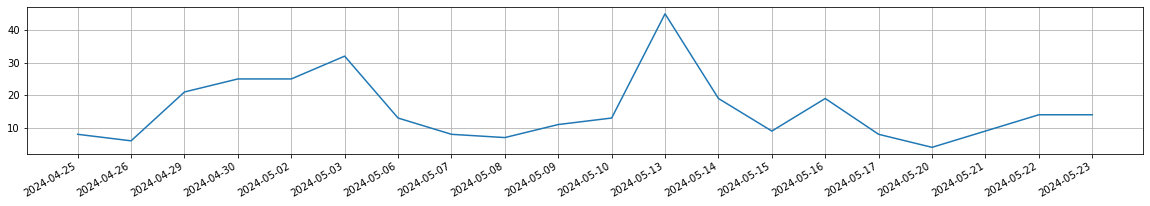

In [96]:
fig, ax = plt.subplots(1, figsize = (20, 3))
ax.grid()
fig.autofmt_xdate()
plt.plot(list(reversed(list_datas)), list(reversed(d05_count)))
plt.show()

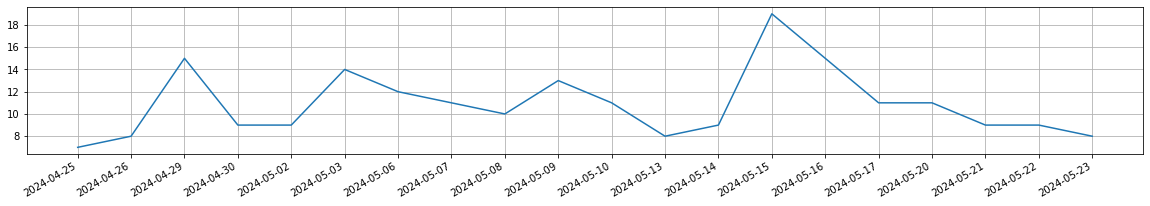

In [93]:
fig, ax = plt.subplots(1, figsize = (20, 3))
ax.grid()
fig.autofmt_xdate()
plt.plot(list(reversed(list_datas)), list(reversed(d10_count)))
plt.show()

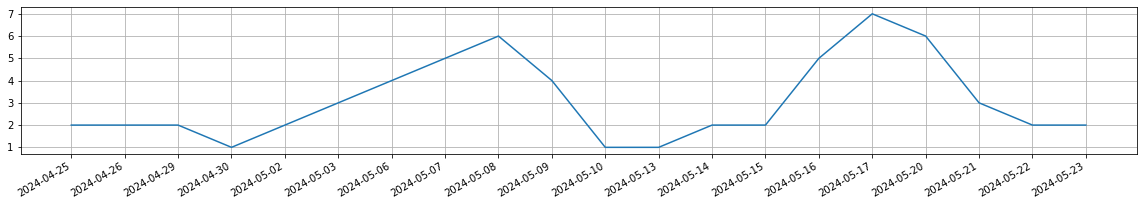

In [92]:
fig, ax = plt.subplots(1, figsize = (20, 3))
ax.grid()
fig.autofmt_xdate()
plt.plot(list(reversed(list_datas)), list(reversed(d15_count)))
plt.show()

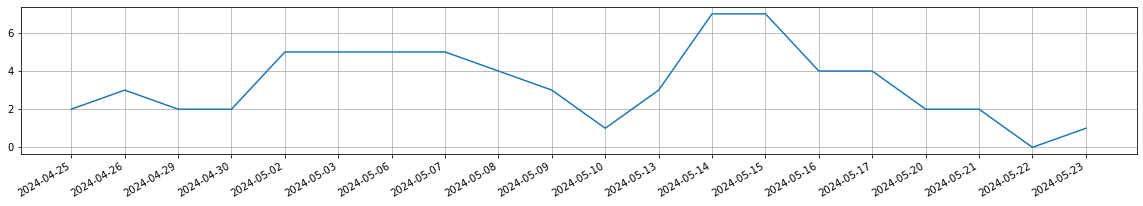

In [91]:
fig, ax = plt.subplots(1, figsize = (20, 3))
ax.grid()
fig.autofmt_xdate()
plt.plot(list(reversed(list_datas)), list(reversed(d20_count)))
plt.show()

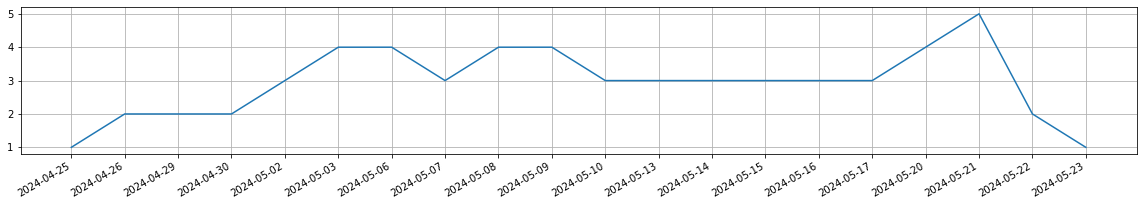

In [90]:
fig, ax = plt.subplots(1, figsize = (20, 3))
ax.grid()
fig.autofmt_xdate()
plt.plot(list(reversed(list_datas)), list(reversed(d25_count)))
plt.show()

### ======================================== TESTES ========================================

In [22]:
bla

NameError: name 'bla' is not defined

### Comparar Maiores Lucros

In [ ]:
df_original = df.copy()

In [ ]:
df = df_original.copy()

In [ ]:
df_teste = df_original.copy()

In [ ]:
dt_max = df_teste["dtPregao"].max()
df_teste = df_teste.loc[df_teste["dtPregao"] != dt_max]

In [ ]:
d05 = monta_tabela(monta_df_periodos(df_teste, 5), 3000000, '1.0%', 5, 2)
d05

In [ ]:
consulta_acao(df_teste, "RAIZ4")

### ----------------------------------------------------------------------------

In [ ]:
df_1 = monta_lucro_periodo(df, 10, 0, True)
df_2 = monta_lucro_periodo(df, 10, 1, True)

In [ ]:
df_final = df_1.copy()
df_final['posicao ant'], df_final['mudanca'] = [
    df_2['posicao']
    , df_2['posicao'] - df_1['posicao']
]
df_final['posicao ant'] = df_final['posicao ant'].fillna(0).astype('int')
df_final['mudanca'] = df_final['mudanca'].fillna(0).astype('int')

In [ ]:
df_final.sort_values(["mudanca"], ascending=False)

In [ ]:
df_final.sort_values(["mudanca"], ascending=False).loc[df_final['posicao ant'] <= 10]

In [ ]:
df_1

In [ ]:
df_2

In [ ]:
# dfDtMin = df5d.loc[(df["dtPregao"] == dt_min_5d) & (df["cdAcao"] == 'PTBL3')]

df5d  = busca_periodos(df, 5)
df25d = busca_periodos(df, 25)

dt_min_5d  = df5d["dtPregao"].min()
dt_min_25d = df25d["dtPregao"].min()
dt_max     = df5d["dtPregao"].max()
dfDtMin5d  = df5d.loc[(df5d["dtPregao"] == dt_min_5d)].set_index(["cdAcao"])
dfDtMin25d = df25d.loc[(df25d["dtPregao"] == dt_min_25d)].set_index(["cdAcao"])
dfDtMax    = df5d.loc[(df5d["dtPregao"] == dt_max)].set_index(["cdAcao"])
dfAvgVol5d  = busca_media(df5d, "vrVolume", "vol").set_index(["cdAcao"])
dfAvgVol25d = busca_media(df25d, "vrVolume", "vol").set_index(["cdAcao"])

In [ ]:
 dfPc5d = pd.DataFrame({
         "dtInicio":dfDtMin5d["dtPregao"] ,"dtFim":dfDtMax["dtPregao"]
        ,"vrInicio":dfDtMin5d["vrFech"]   ,"vrFim":dfDtMax["vrFech"]
        ,"pcPeriodo":((dfDtMax["vrFech"] - dfDtMin5d["vrFech"]) / dfDtMin5d["vrFech"]) * 100
        ,"avgVol":dfAvgVol5d["vol"]
    })

In [ ]:
 dfPc25d = pd.DataFrame({
         "dtInicio":dfDtMin25d["dtPregao"] ,"dtFim":dfDtMax["dtPregao"]
        ,"vrInicio":dfDtMin25d["vrFech"]   ,"vrFim":dfDtMax["vrFech"]
        ,"pcPeriodo":((dfDtMax["vrFech"] - dfDtMin25d["vrFech"]) / dfDtMin25d["vrFech"]) * 100
        ,"avgVol":dfAvgVol25d["vol"]
    })

In [ ]:
# dfPc25d.sort_values(["pcPeriodo"], ascending=False).loc[(dfPc25d["avgVol"] > 6000000)]

In [ ]:
# dfPc5d.sort_values(["pcPeriodo"], ascending=False).loc[(dfPc5d["avgVol"] > 6000000)]

In [ ]:
# dfPc25d['pcPeriodo']

In [ ]:
df_temp = monta_lucro_periodo(df, 25, 0, True)
# monta_lucro_periodo(df, 25, 0)

In [ ]:
# df_temp

In [ ]:
df_n_dias = busca_periodos(df, 26)

dias_ant = 2
i = 0
while i <= dias_ant:
    dt_max  = df_n_dias["dtPregao"].max()
    df_n_dias = df_n_dias.loc[df_n_dias["dtPregao"] != dt_max]
    i += 1
    
dt_max

In [ ]:
### 25 dias, Order by 0.5% # df05.loc[(df05["AvgVol"] > 6000000) & (df05["0.5%"] >= 23) & (df05["AvgVrFech"] > 5)].sort_values(["0.5%", "1.0%", "1.5%", "2.0%"], ascending=False)
### 20 dias, Order by 0.5% # df05_20d.loc[(df05_20d["AvgVol"] > 6000000) & (df05_20d["0.5%"] >= 19) & (df05_20d["AvgVrFech"] > 5)].sort_values(["0.5%", "1.0%", "1.5%", "2.0%"], ascending=False)
### 15 dias, Order by 0.5% # df05_15d.loc[(df05_15d["AvgVol"] > 6000000) & (df05_15d["0.5%"] >= 15) & (df05_15d["AvgVrFech"] > 5)].sort_values(["0.5%", "1.0%", "1.5%", "2.0%"], ascending=False)

## Definindo valores para compra

In [ ]:
# Valor disponível para cmp / 1000
# Valor da ação no leilão
vr_corretagem = 9.8
emolumentos = 0.000325
acao = 'LIGT3'
vr_disp = 110
vr_acao_leilao = 1148 / 100
vr_qtd = round((vr_disp * 1000) / (vr_acao_leilao * 100)) * 100

In [ ]:
vr_cmp = round(vr_acao_leilao * 1.014, 2)

vr_tot_cmp = vr_acao_leilao * vr_qtd
corret_cmp = vr_corretagem + (vr_tot_cmp * emolumentos)
vr_tot_liq_cmp = vr_tot_cmp + corret_cmp

vr_acao_vnd_10 = float('{0:.2f}'.format(vr_acao_leilao * 1.0108 + 0.01))
vr_tot_vnd_10 = vr_acao_vnd_10 * vr_qtd
corret_vnd_10 = vr_corretagem + (vr_tot_vnd_10 * emolumentos)
vr_tot_liq_vnd_10 = vr_tot_vnd_10 - corret_vnd_10

vr_acao_vnd_15 = float('{0:.2f}'.format(vr_acao_leilao * 1.0158 + 0.01))
vr_tot_vnd_15 = vr_acao_vnd_15 * vr_qtd
corret_vnd_15 = vr_corretagem + (vr_tot_vnd_15 * emolumentos)
vr_tot_liq_vnd_15 = vr_tot_vnd_15 - corret_vnd_15

In [ ]:
d = {'Compra':     ['Quantidade', 'Valor Leilão', 'Total', 'Total líquido', 'Corretagem Compra'],
     ' ':          [vr_qtd, vr_acao_leilao, vr_tot_cmp, vr_tot_liq_cmp, corret_cmp],
     'Venda 1,0%': ['Valor compra', 'Valor', 'Total', 'Total líquido', 'Corretagem Venda'],
     '1,0%':       [vr_cmp, vr_acao_vnd_10, vr_tot_vnd_10, vr_tot_liq_vnd_10, corret_vnd_10],
     'Venda 1,5%': [' ', 'Valor', 'Total', 'Total líquido', 'Corretagem Venda'],
     '1,5%':       [' ', vr_acao_vnd_15, vr_tot_vnd_15, vr_tot_liq_vnd_15, corret_vnd_15]
    }
df_calc = pd.DataFrame(data=d)
df_calc

In [ ]:
d2 = {'Index':      ['Quantidade', 'Valor', 'Total', 'Total líquido', 'Corretagem'],
      'Compra':     [vr_qtd, vr_cmp, vr_tot_cmp, vr_tot_liq_cmp, corret_cmp],
      'Venda 1.0%': [vr_qtd, vr_acao_vnd_10, vr_tot_vnd_10, vr_tot_liq_vnd_10, corret_vnd_10],
      'Venda 1.5%': [vr_qtd, vr_acao_vnd_15, vr_tot_vnd_15, vr_tot_liq_vnd_15, corret_vnd_15]
     }
df_calc2 = pd.DataFrame(data=d2)
df_calc2.set_index('Index')
df_calc2

In [ ]:
time.asctime( time.localtime(time.time()) )